# Day9_0: 확률 분포 (Probability Distributions)

## 📚 학습 목표

**Part 1: 기초 개념**
1. 확률 변수와 확률 분포의 개념 이해하기
2. 기댓값과 분산의 의미 파악하기
3. 정규분포의 특성과 활용법 배우기
4. 확률 밀도 함수(PDF)와 누적 분포 함수(CDF) 구분하기
5. scipy.stats 기본 사용법 익히기

**Part 2: 심화 분포**
1. 이항분포로 성공/실패 확률 계산하기
2. 포아송분포로 희귀 사건 모델링하기
3. Q-Q plot으로 정규성 검정하기
4. 실무 데이터에 분포 적용하기

---

## 🎯 왜 이것을 배우나요?

| 개념 | 실무 활용 | 예시 |
|------|----------|------|
| 정규분포 | 품질 관리 | 제품 불량률 예측, 공정 관리 |
| 이항분포 | 전환율 분석 | 클릭률, 구매 전환율 계산 |
| 포아송분포 | 수요 예측 | 콜센터 통화량, 웹사이트 방문자 수 |
| Q-Q plot | 데이터 검증 | 분석 전 정규성 가정 확인 |

**분석가 관점**: 확률 분포는 불확실성을 수치화하여 데이터 기반 의사결정의 신뢰도를 높이는 핵심 도구입니다!

---

# Part 1: 기초 개념

---

## 1.1 확률 변수와 확률 분포

### 확률 변수(Random Variable)란?

- **확률 변수**: 무작위 실험의 결과를 숫자로 나타낸 것
- **이산형**: 셀 수 있는 값 (동전 앞면 수, 불량품 개수)
- **연속형**: 측정 가능한 값 (키, 온도, 매출)

In [16]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 난수 시드 고정 (재현성)
np.random.seed(42)

print("라이브러리 임포트 완료")

라이브러리 임포트 완료


In [17]:
# 이산형 vs 연속형 확률 변수 예시
print("=" * 50)
print("확률 변수의 종류")
print("=" * 50)

examples = pd.DataFrame({
    '유형': ['이산형', '이산형', '이산형', '연속형', '연속형', '연속형'],
    '확률 변수': ['불량품 개수', '클릭 횟수', '고객 문의 수', '제품 무게', '배송 시간', '일일 매출'],
    '가능한 값': ['0, 1, 2, 3...', '0, 1, 2, 3...', '0, 1, 2, 3...', '49.5~50.5g', '1.2~3.8시간', '0~무한대'],
    '적합 분포': ['이항분포', '포아송분포', '포아송분포', '정규분포', '정규분포', '정규분포']
})

print(examples.to_string(index=False))

확률 변수의 종류
 유형   확률 변수         가능한 값 적합 분포
이산형  불량품 개수 0, 1, 2, 3...  이항분포
이산형   클릭 횟수 0, 1, 2, 3... 포아송분포
이산형 고객 문의 수 0, 1, 2, 3... 포아송분포
연속형   제품 무게    49.5~50.5g  정규분포
연속형   배송 시간     1.2~3.8시간  정규분포
연속형   일일 매출         0~무한대  정규분포


### 확률 분포(Probability Distribution)란?

- **확률 분포**: 확률 변수가 특정 값을 가질 확률을 나타내는 함수
- 데이터의 패턴과 불확실성을 수학적으로 모델링

### 💡 실무 예시: 콜센터 통화량 분석

**상황**: 콜센터에서 시간당 평균 15건의 전화가 옵니다. 특정 시간에 20건 이상 전화가 올 확률은?

In [18]:
# 포아송분포로 모델링 (나중에 자세히 배웁니다)
avg_calls = 15  # 시간당 평균 통화 수

# 20건 이상 확률 = 1 - P(X < 20) = 1 - P(X <= 19)
prob_over_20 = 1 - stats.poisson.cdf(19, avg_calls)

print(f"시간당 평균 통화: {avg_calls}건")
print(f"20건 이상 통화 확률: {prob_over_20:.2%}")
print("\n이 확률을 알면 인력 배치를 최적화할 수 있습니다!")

시간당 평균 통화: 15건
20건 이상 통화 확률: 12.48%

이 확률을 알면 인력 배치를 최적화할 수 있습니다!


---

## 1.2 기댓값과 분산

### 기댓값(Expected Value, E[X])

- **정의**: 확률 변수의 평균적인 값
- **의미**: 반복 시행 시 평균적으로 기대되는 결과
- 수식: E[X] = sum(x * P(X=x))

### 분산(Variance, Var[X])

- **정의**: 기댓값으로부터의 평균적인 편차 제곱
- **의미**: 데이터가 평균에서 얼마나 흩어져 있는지
- 수식: Var[X] = E[(X - E[X])^2]

In [4]:
# 주사위 던지기 예시
outcomes = [1, 2, 3, 4, 5, 6]
probabilities = [1/6] * 6  # 각 면이 나올 확률은 동일

# 기댓값 계산
expected_value = sum(x * p for x, p in zip(outcomes, probabilities))

# 분산 계산
variance = sum((x - expected_value)**2 * p for x, p in zip(outcomes, probabilities))

# 표준편차
std_dev = np.sqrt(variance)

print("주사위 던지기 분석")
print("=" * 40)
print(f"기댓값 E[X]: {expected_value:.2f}")
print(f"분산 Var[X]: {variance:.2f}")
print(f"표준편차: {std_dev:.2f}")

주사위 던지기 분석
기댓값 E[X]: 3.50
분산 Var[X]: 2.92
표준편차: 1.71


### 💡 실무 예시: 광고 클릭 기대 수익

**상황**: 광고 클릭당 수익이 다음과 같을 때 기대 수익은?

In [19]:
# 광고 클릭 결과별 확률과 수익              #이것도 실무에서 진짜 많이 하는 분석! 
click_results = pd.DataFrame({
    '결과': ['이탈', '상품 조회', '장바구니', '구매'],
    '확률': [0.70, 0.15, 0.10, 0.05],
    '수익(원)': [0, 100, 500, 5000]
})

print("광고 클릭 결과별 확률과 수익:")
print(click_results.to_string(index=False))

# 기대 수익 계산
expected_revenue = sum(click_results['확률'] * click_results['수익(원)'])

print(f"\n클릭당 기대 수익: {expected_revenue:,.0f}원")
print(f"1000 클릭 시 예상 수익: {expected_revenue * 1000:,.0f}원")

광고 클릭 결과별 확률과 수익:
   결과   확률  수익(원)
   이탈 0.70      0
상품 조회 0.15    100
 장바구니 0.10    500
   구매 0.05   5000

클릭당 기대 수익: 315원
1000 클릭 시 예상 수익: 315,000원


---

## 1.3 정규분포 (Normal Distribution)

### 정규분포란?

- **가장 중요한 연속형 확률 분포**
- 자연현상, 측정값, 오차 등 많은 현상이 정규분포를 따름
- 평균(mu)과 표준편차(sigma)로 완전히 정의됨
- 종 모양의 대칭적인 곡선

### 68-95-99.7 규칙

- 평균 +/- 1 표준편차: 약 68% 데이터
- 평균 +/- 2 표준편차: 약 95% 데이터
- 평균 +/- 3 표준편차: 약 99.7% 데이터

In [20]:
import scipy

정규분포 N(100, 15) 주요 메소드
평균: 100.00
분산: 225.00
표준편차: 15.00


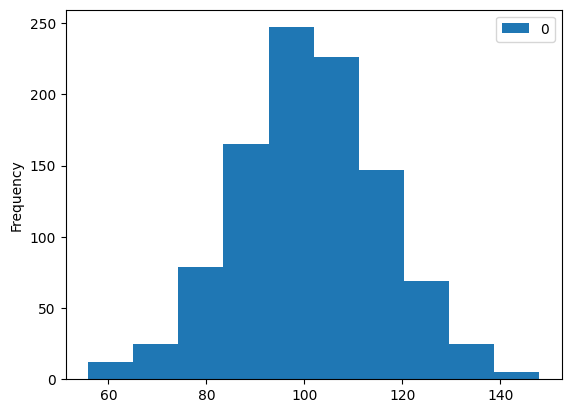

In [22]:
# scipy.stats.norm 사용법
mu = 100      # 평균
sigma = 15    # 표준편차

# 정규분포 객체 생성
normal_dist = stats.norm(loc=mu, scale=sigma)       #stats.norm은 정규분포를 생성하는 함수
pd.DataFrame(normal_dist.rvs(size=1000)).plot.hist()    #loc는 평균, scale은 표준편차
                                                          
# 주요 메소드
print("정규분포 N(100, 15) 주요 메소드")
print("=" * 50)
print(f"평균: {normal_dist.mean():.2f}")
print(f"분산: {normal_dist.var():.2f}")
print(f"표준편차: {normal_dist.std():.2f}")

### 💡 실무 예시: IQ 점수 분석

**상황**: IQ 점수는 평균 100, 표준편차 15인 정규분포를 따릅니다.

In [ ]:
# IQ 분포
iq_dist = stats.norm(loc=100, scale=15)

# 68-95-99.7 규칙 확인
print("IQ 분포 (평균=100, 표준편차=15)")
print("=" * 50)

# 1 표준편차 이내
prob_1std = iq_dist.cdf(115) - iq_dist.cdf(85)
print(f"85~115 사이 (1 표준편차): {prob_1std:.1%}")

# 2 표준편차 이내
prob_2std = iq_dist.cdf(130) - iq_dist.cdf(70)
print(f"70~130 사이 (2 표준편차): {prob_2std:.1%}")

# 3 표준편차 이내
prob_3std = iq_dist.cdf(145) - iq_dist.cdf(55)
print(f"55~145 사이 (3 표준편차): {prob_3std:.2%}")

---

## 1.4 확률 밀도 함수(PDF)와 누적 분포 함수(CDF)

### PDF (Probability Density Function)

- **정의**: 특정 값에서의 확률 밀도
- **의미**: 그 값 근처에서 데이터가 나타날 상대적 가능성
- scipy: `dist.pdf(x)`

### CDF (Cumulative Distribution Function)

- **정의**: 특정 값 이하일 확률 P(X <= x)
- **의미**: "이 값보다 작거나 같을 확률"
- scipy: `dist.cdf(x)`

In [23]:
# PDF와 CDF 비교
x_values = np.linspace(50, 150, 200)
normal_dist = stats.norm(loc=100, scale=15)

pdf_values = normal_dist.pdf(x_values)
pdf_values


array([0.00010282, 0.0001149 , 0.00012826, 0.00014301, 0.00015928,
       0.0001772 , 0.00019692, 0.00021858, 0.00024236, 0.00026842,
       0.00029694, 0.00032814, 0.0003622 , 0.00039935, 0.00043981,
       0.00048384, 0.00053167, 0.00058358, 0.00063983, 0.00070072,
       0.00076655, 0.00083761, 0.00091424, 0.00099676, 0.00108551,
       0.00118084, 0.0012831 , 0.00139265, 0.00150985, 0.00163509,
       0.00176872, 0.00191113, 0.00206269, 0.00222378, 0.00239475,
       0.00257598, 0.00276781, 0.0029706 , 0.00318466, 0.00341032,
       0.00364787, 0.0038976 , 0.00415975, 0.00443455, 0.0047222 ,
       0.00502287, 0.00533669, 0.00566376, 0.00600413, 0.00635782,
       0.00672479, 0.00710497, 0.00749821, 0.00790435, 0.00832314,
       0.00875428, 0.00919744, 0.00965218, 0.01011805, 0.0105945 ,
       0.01108095, 0.01157673, 0.01208113, 0.01259337, 0.0131126 ,
       0.01363792, 0.01416838, 0.01470296, 0.01524059, 0.01578017,
       0.01632052, 0.01686044, 0.01739868, 0.01793397, 0.01846

In [24]:

cdf_values = normal_dist.cdf(x_values)      #누적분포함수

# Plotly로 시각화
fig = make_subplots(rows=1, cols=2, subplot_titles=('PDF (확률 밀도 함수)', 'CDF (누적 분포 함수)'))

# PDF
fig.add_trace(
    go.Scatter(x=x_values, y=pdf_values, mode='lines', name='PDF', line=dict(color='blue', width=2)),
    row=1, col=1
)

# CDF
fig.add_trace(
    go.Scatter(x=x_values, y=cdf_values, mode='lines', name='CDF', line=dict(color='red', width=2)),
    row=1, col=2
)

fig.update_layout(height=400, width=900, title_text='정규분포 N(100, 15)의 PDF와 CDF')
fig.update_xaxes(title_text='X', row=1, col=1)
fig.update_xaxes(title_text='X', row=1, col=2)
fig.update_yaxes(title_text='밀도', row=1, col=1)
fig.update_yaxes(title_text='누적 확률', row=1, col=2)

fig.show()

In [ ]:
# CDF 활용: 확률 계산
iq_dist = stats.norm(loc=100, scale=15)

print("CDF를 활용한 확률 계산")
print("=" * 50)

# P(X <= 120): IQ 120 이하일 확률
prob_under_120 = iq_dist.cdf(120)
print(f"IQ 120 이하일 확률: {prob_under_120:.2%}")

# P(X > 130): IQ 130 초과일 확률
prob_over_130 = 1 - iq_dist.cdf(130)
print(f"IQ 130 초과일 확률: {prob_over_130:.2%}")

# P(90 <= X <= 110): IQ 90~110 사이일 확률
prob_between = iq_dist.cdf(110) - iq_dist.cdf(90)
print(f"IQ 90~110 사이일 확률: {prob_between:.2%}")

### 💡 실무 예시: 품질 관리 - 불량품 비율 계산

**상황**: 제품 무게가 평균 500g, 표준편차 10g인 정규분포를 따릅니다. 규격은 480~520g입니다.

In [ ]:
# 제품 무게 분포
weight_dist = stats.norm(loc=500, scale=10)

# 규격 내 제품 비율
lower_spec = 480
upper_spec = 520

in_spec_ratio = weight_dist.cdf(upper_spec) - weight_dist.cdf(lower_spec)
defect_ratio = 1 - in_spec_ratio

print("제품 무게 품질 분석")
print("=" * 50)
print(f"평균: 500g, 표준편차: 10g")
print(f"규격: {lower_spec}g ~ {upper_spec}g")
print(f"\n규격 내 비율: {in_spec_ratio:.2%}")
print(f"불량률: {defect_ratio:.2%}")
print(f"\n10,000개 생산 시 예상 불량: {defect_ratio * 10000:.0f}개")

---

## 1.5 scipy.stats 기본 사용법

### 주요 메소드 정리

| 메소드 | 설명 | 예시 |
|--------|------|------|
| `pdf(x)` | 확률 밀도 | `norm.pdf(100)` |
| `cdf(x)` | 누적 확률 P(X<=x) | `norm.cdf(100)` |
| `ppf(q)` | 분위수 (CDF 역함수) | `norm.ppf(0.95)` |
| `rvs(size)` | 난수 생성 | `norm.rvs(size=100)` |
| `mean()` | 기댓값 | `norm.mean()` |
| `var()` | 분산 | `norm.var()` |
| `std()` | 표준편차 | `norm.std()` |

In [ ]:
# scipy.stats 메소드 실습
dist = stats.norm(loc=100, scale=15)

print("scipy.stats 메소드 실습")
print("=" * 50)

# pdf: 특정 값에서의 밀도
print(f"pdf(100): {dist.pdf(100):.4f} (평균에서의 밀도)")
print(f"pdf(130): {dist.pdf(130):.4f} (2 표준편차 위에서의 밀도)")

print()

# cdf: 누적 확률
print(f"cdf(100): {dist.cdf(100):.2%} (평균 이하 확률)")
print(f"cdf(115): {dist.cdf(115):.2%} (1 표준편차 이하 확률)")

print()

# ppf: 분위수 (상위 몇 %인지 역으로 계산)
print(f"ppf(0.50): {dist.ppf(0.50):.1f} (중앙값)")
print(f"ppf(0.95): {dist.ppf(0.95):.1f} (상위 5% 기준점)")
print(f"ppf(0.99): {dist.ppf(0.99):.1f} (상위 1% 기준점)")

In [ ]:
# 난수 생성으로 시뮬레이션
np.random.seed(42)

# 정규분포에서 1000개 샘플 생성
samples = stats.norm.rvs(loc=100, scale=15, size=1000)

print("난수 생성 결과 (N=1000)")
print("=" * 50)
print(f"샘플 평균: {np.mean(samples):.2f} (이론값: 100)")
print(f"샘플 표준편차: {np.std(samples, ddof=1):.2f} (이론값: 15)")
print(f"샘플 최소: {np.min(samples):.2f}")
print(f"샘플 최대: {np.max(samples):.2f}")

### 💡 실무 예시: 신뢰구간 계산

**상황**: 표본 평균의 95% 신뢰구간을 계산합니다.
신뢰구간을 구하는 이유는 모집단을 모르기 때문

In [ ]:
# 고객 만족도 점수 (1-5점)
satisfaction_scores = [4.2, 3.8, 4.5, 4.1, 3.9, 4.3, 4.0, 4.4, 3.7, 4.2,
                       4.1, 4.3, 3.8, 4.0, 4.2, 4.5, 3.9, 4.1, 4.4, 4.0]

sample_mean = np.mean(satisfaction_scores)
sample_std = np.std(satisfaction_scores, ddof=1)
n = len(satisfaction_scores)

# 95% 신뢰구간 계산 (t-분포 사용)
confidence_level = 0.95
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-1)
margin_of_error = t_critical * (sample_std / np.sqrt(n))

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print("고객 만족도 분석")                   #ppf는 cdf의 역함수
print("=" * 50)
print(f"표본 크기: {n}")
print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}")
print(f"\n95% 신뢰구간: ({ci_lower:.2f}, {ci_upper:.2f})")
print(f"\n해석: 모집단 평균 만족도는 95% 확률로 {ci_lower:.2f}~{ci_upper:.2f} 사이에 있습니다.")

---

# Part 2: 심화 분포

---

## 2.1 이항분포 (Binomial Distribution)

### 이항분포란?

- **n번의 독립적인 시행**에서 **성공 횟수**의 분포
- 각 시행의 성공 확률 **p**는 동일
- 예: 동전 10번 던져서 앞면 나오는 횟수

### 파라미터

- **n**: 시행 횟수
- **p**: 각 시행의 성공 확률
- scipy: `stats.binom(n, p)`

In [ ]:
# 이항분포 기본
n = 10  # 시행 횟수
p = 0.5  # 성공 확률 (동전 앞면)

binom_dist = stats.binom(n, p)

print(f"이항분포 B({n}, {p})")
print("=" * 50)
print(f"기댓값 (평균 성공 횟수): {binom_dist.mean():.1f}")
print(f"분산: {binom_dist.var():.2f}")
print(f"표준편차: {binom_dist.std():.2f}")

In [ ]:
# 이항분포 확률 계산
print("동전 10번 던지기 확률")
print("=" * 50)

# pmf: 정확히 k번 성공할 확률 (이산형은 pdf 대신 pmf 사용)
for k in range(11):
    prob = binom_dist.pmf(k)
    bar = '*' * int(prob * 100)
    print(f"앞면 {k:2d}번: {prob:.4f} {bar}")

In [ ]:
# 이항분포 시각화
x = np.arange(0, 11)
probs = binom_dist.pmf(x)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=x,
    y=probs,
    marker_color='steelblue',
    text=[f'{p:.2%}' for p in probs],
    textposition='outside'
))

fig.update_layout(
    title='이항분포 B(10, 0.5) - 동전 10번 던지기',
    xaxis_title='앞면 횟수',
    yaxis_title='확률',
    height=450,
    width=700
)

fig.show()

### 💡 실무 예시: 광고 클릭률 분석

**상황**: 광고의 클릭률이 3%입니다. 1000명에게 노출했을 때 40명 이상 클릭할 확률은?

In [ ]:
# 광고 클릭 분석
impressions = 1000  # 노출 수
click_rate = 0.03   # 클릭률 3%

ad_dist = stats.binom(impressions, click_rate)

print("광고 클릭 분석")
print("=" * 50)
print(f"노출 수: {impressions:,}명")
print(f"클릭률: {click_rate:.1%}")
print(f"\n기대 클릭 수: {ad_dist.mean():.1f}명")
print(f"표준편차: {ad_dist.std():.2f}명")

# 40명 이상 클릭 확률
prob_40_or_more = 1 - ad_dist.cdf(39)
print(f"\n40명 이상 클릭 확률: {prob_40_or_more:.2%}")

# 20명 이하 클릭 확률
prob_20_or_less = ad_dist.cdf(20)
print(f"20명 이하 클릭 확률: {prob_20_or_less:.2%}")

### 💡 실무 예시: 제품 불량률 관리

**상황**: 불량률이 2%인 생산라인에서 100개 샘플 검사 시 불량 개수 분포

In [ ]:
# 품질 관리
sample_size = 100
defect_rate = 0.02

defect_dist = stats.binom(sample_size, defect_rate)

print("품질 관리 분석")
print("=" * 50)
print(f"샘플 크기: {sample_size}개")
print(f"불량률: {defect_rate:.1%}")
print(f"\n기대 불량 개수: {defect_dist.mean():.1f}개")

# 불량 0개일 확률
prob_zero_defect = defect_dist.pmf(0)
print(f"불량 0개 확률: {prob_zero_defect:.2%}")

# 불량 5개 이상일 확률 (경보 기준)
prob_5_or_more = 1 - defect_dist.cdf(4)
print(f"불량 5개 이상 확률 (경보): {prob_5_or_more:.2%}")

---

## 2.2 포아송분포 (Poisson Distribution)

### 포아송분포란?

- **일정 시간/공간 내 희귀 사건의 발생 횟수** 분포
- 평균 발생률 **lambda**로 정의
- 예: 시간당 전화 수, 하루 방문객 수, 페이지당 오타 수

### 특성

- 기댓값 = 분산 = lambda
- n이 크고 p가 작을 때 이항분포의 근사
- scipy: `stats.poisson(mu)`

In [ ]:
# 포아송분포 기본
lambda_param = 5  # 평균 발생률

poisson_dist = stats.poisson(lambda_param)

print(f"포아송분포 Poisson({lambda_param})")
print("=" * 50)
print(f"기댓값: {poisson_dist.mean():.1f}")
print(f"분산: {poisson_dist.var():.1f}")
print(f"표준편차: {poisson_dist.std():.2f}")
print(f"\n특징: 기댓값 = 분산 = lambda")

In [ ]:
# 포아송분포 시각화
lambdas = [1, 4, 10]
colors = ['blue', 'green', 'red']

fig = go.Figure()

for lam, color in zip(lambdas, colors):
    x = np.arange(0, 20)
    probs = stats.poisson.pmf(x, lam)
    
    fig.add_trace(go.Bar(
        x=x,
        y=probs,
        name=f'lambda = {lam}',
        marker_color=color,
        opacity=0.7
    ))

fig.update_layout(
    title='다양한 lambda 값의 포아송분포',
    xaxis_title='발생 횟수',
    yaxis_title='확률',
    barmode='group',
    height=450,
    width=800
)

fig.show()

### 💡 실무 예시: 콜센터 인력 배치

**상황**: 콜센터에 시간당 평균 12건의 전화가 옵니다. 상담원 1명이 시간당 4건 처리 가능할 때 필요 인력은?

In [ ]:
# 콜센터 분석
avg_calls_per_hour = 12
calls_per_agent = 4

call_dist = stats.poisson(avg_calls_per_hour)

print("콜센터 인력 분석")
print("=" * 50)
print(f"시간당 평균 통화: {avg_calls_per_hour}건")
print(f"상담원 1인당 처리량: {calls_per_agent}건/시간")

# 다양한 인력 수준에서 대기 확률 계산
print("\n인력별 통화 대기 확률:")
for agents in [3, 4, 5, 6]:
    capacity = agents * calls_per_agent
    # 통화량이 처리량 초과할 확률
    prob_overflow = 1 - call_dist.cdf(capacity)
    print(f"  상담원 {agents}명 (처리량 {capacity}건): 대기 발생 확률 {prob_overflow:.1%}")

# 권장 인력
print("\n권장: 5명 배치 (대기 확률 2% 미만)")

### 💡 실무 예시: 웹사이트 트래픽 분석

**상황**: 웹사이트에 분당 평균 50명이 방문합니다. 서버 용량이 분당 70명일 때 과부하 확률은?

In [ ]:
# 웹 트래픽 분석
avg_visitors_per_min = 50
server_capacity = 70

traffic_dist = stats.poisson(avg_visitors_per_min)

print("웹사이트 트래픽 분석")
print("=" * 50)
print(f"분당 평균 방문자: {avg_visitors_per_min}명")
print(f"서버 용량: {server_capacity}명/분")

# 과부하 확률
prob_overload = 1 - traffic_dist.cdf(server_capacity)
print(f"\n과부하 확률 (>{server_capacity}명): {prob_overload:.2%}")

# 하루 8시간 운영 시 예상 과부하 횟수
minutes_per_day = 8 * 60
expected_overloads = prob_overload * minutes_per_day
print(f"하루 예상 과부하 횟수: {expected_overloads:.1f}회")

# 99% 신뢰도로 필요한 용량
required_capacity = traffic_dist.ppf(0.99)
print(f"\n99% 신뢰도 필요 용량: {required_capacity:.0f}명/분")

---

## 2.3 Q-Q Plot으로 정규성 검정

### Q-Q Plot이란?

- **Quantile-Quantile Plot**
- 데이터가 특정 분포(주로 정규분포)를 따르는지 시각적으로 확인
- 점들이 직선에 가까우면 정규분포를 따름

### 왜 정규성 검정이 중요한가?

- 많은 통계 검정(t-test, ANOVA)이 정규분포 가정
- 정규분포가 아니면 비모수 검정 고려

In [ ]:
# Q-Q Plot 함수 정의
def plot_qq(data, title="Q-Q Plot"):
    """
    Plotly로 Q-Q plot 생성
    """
    # 이론적 분위수와 샘플 분위수 계산
    sorted_data = np.sort(data)
    n = len(data)
    theoretical_quantiles = stats.norm.ppf(np.arange(1, n + 1) / (n + 1))
    
    # 회귀선 계산
    slope, intercept, r_value, _, _ = stats.linregress(theoretical_quantiles, sorted_data)
    line_y = slope * theoretical_quantiles + intercept
    
    fig = go.Figure()
    
    # 산점도
    fig.add_trace(go.Scatter(
        x=theoretical_quantiles,
        y=sorted_data,
        mode='markers',
        name='데이터',
        marker=dict(color='blue', size=8)
    ))
    
    # 기준선
    fig.add_trace(go.Scatter(
        x=theoretical_quantiles,
        y=line_y,
        mode='lines',
        name=f'기준선 (R2={r_value**2:.3f})',
        line=dict(color='red', dash='dash')
    ))
    
    fig.update_layout(
        title=title,
        xaxis_title='이론적 분위수',
        yaxis_title='샘플 분위수',
        height=450,
        width=550
    )
    
    return fig, r_value**2

In [ ]:
# 정규분포 데이터 생성 및 Q-Q plot
np.random.seed(42)
normal_data = stats.norm.rvs(loc=100, scale=15, size=100)

fig, r2 = plot_qq(normal_data, "정규분포 데이터 Q-Q Plot")
fig.show()

print(f"R-squared: {r2:.4f}")
print("점들이 직선에 잘 맞으면 정규분포!")

In [ ]:
# 비정규 데이터 (지수분포) Q-Q plot
np.random.seed(42)
exponential_data = stats.expon.rvs(scale=10, size=100)

fig, r2 = plot_qq(exponential_data, "비정규(지수분포) 데이터 Q-Q Plot")
fig.show()

print(f"R-squared: {r2:.4f}")
print("점들이 곡선을 그리면 정규분포가 아님!")

### Shapiro-Wilk 검정

- 정규성을 통계적으로 검정하는 방법
- H0: 데이터가 정규분포를 따른다
- p-value < 0.05 이면 정규분포가 아님

In [ ]:
# Shapiro-Wilk 검정
print("Shapiro-Wilk 정규성 검정")
print("=" * 50)

# 정규분포 데이터
stat1, p1 = stats.shapiro(normal_data)
print(f"정규분포 데이터: W={stat1:.4f}, p-value={p1:.4f}")
if p1 > 0.05:
    print("  -> 정규분포를 따름 (귀무가설 채택)")

print()

# 지수분포 데이터
stat2, p2 = stats.shapiro(exponential_data)
print(f"지수분포 데이터: W={stat2:.4f}, p-value={p2:.4f}")
if p2 < 0.05:
    print("  -> 정규분포가 아님 (귀무가설 기각)")

### 💡 실무 예시: 매출 데이터 정규성 검정

**상황**: 일별 매출 데이터가 정규분포를 따르는지 확인하여 적절한 분석 방법을 선택합니다.

In [ ]:
# 매출 데이터 생성 (약간 오른쪽 치우침)
np.random.seed(42)
daily_sales = np.random.lognormal(mean=5, sigma=0.5, size=50)  # 로그정규분포

print("일별 매출 데이터 분석")
print("=" * 50)
print(f"평균: {np.mean(daily_sales):.1f}만원")
print(f"중앙값: {np.median(daily_sales):.1f}만원")
print(f"표준편차: {np.std(daily_sales):.1f}만원")

# 평균 > 중앙값이면 오른쪽 치우침 가능성
if np.mean(daily_sales) > np.median(daily_sales):
    print("\n평균 > 중앙값: 오른쪽 치우침 가능성")

# Shapiro-Wilk 검정
stat, p_value = stats.shapiro(daily_sales)
print(f"\nShapiro-Wilk 검정: p-value = {p_value:.4f}")

if p_value < 0.05:
    print("-> 정규분포가 아님. 비모수 검정 권장!")
else:
    print("-> 정규분포를 따름. t-test 사용 가능!")

In [ ]:
# Q-Q plot으로 시각적 확인
fig, r2 = plot_qq(daily_sales, "일별 매출 Q-Q Plot")
fig.show()

print(f"R-squared: {r2:.4f}")
print("오른쪽 끝에서 직선에서 벗어남 -> 오른쪽 꼬리가 긴 분포")

---

## 2.4 실무 데이터에 분포 적용하기

### 어떤 분포를 선택할까?

| 상황 | 분포 | 예시 |
|------|------|------|
| 연속 측정값, 자연현상 | 정규분포 | 키, 체중, 온도, 품질 측정치 |
| n번 시행 중 성공 횟수 | 이항분포 | 클릭률, 전환율, 불량률 |
| 일정 시간/공간 내 사건 수 | 포아송분포 | 콜센터 통화, 웹 방문, 사고 건수 |

### 💡 종합 실무 예시: 이커머스 전환율 분석

**시나리오**: 온라인 쇼핑몰의 구매 전환율을 분석합니다.

In [ ]:
# 시나리오: 구매 전환율 분석
daily_visitors = 5000     # 일일 방문자
conversion_rate = 0.025   # 전환율 2.5%

# 이항분포로 모델링
conversion_dist = stats.binom(daily_visitors, conversion_rate)

print("이커머스 전환율 분석")
print("=" * 60)
print(f"일일 방문자: {daily_visitors:,}명")
print(f"기본 전환율: {conversion_rate:.1%}")

# 기대 구매자 수
expected_buyers = conversion_dist.mean()
std_buyers = conversion_dist.std()

print(f"\n기대 구매자 수: {expected_buyers:.0f}명")
print(f"표준편차: {std_buyers:.1f}명")

# 95% 신뢰구간
ci_lower = conversion_dist.ppf(0.025)
ci_upper = conversion_dist.ppf(0.975)
print(f"95% 신뢰구간: {ci_lower:.0f} ~ {ci_upper:.0f}명")

In [ ]:
# A/B 테스트 시나리오: 새 디자인이 전환율을 높였는가?
print("\nA/B 테스트 시나리오")
print("=" * 60)

# 기존 디자인
visitors_a = 5000
buyers_a = 125  # 2.5%

# 새 디자인  
visitors_b = 5000
buyers_b = 150  # 3.0%

rate_a = buyers_a / visitors_a
rate_b = buyers_b / visitors_b

print(f"기존 디자인: {buyers_a}/{visitors_a} = {rate_a:.2%}")
print(f"새 디자인: {buyers_b}/{visitors_b} = {rate_b:.2%}")
print(f"개선율: {(rate_b - rate_a) / rate_a:.1%}")

# 이 차이가 우연인지 통계적으로 검정
# 이항분포 가정 하에서 기존 전환율로 150명 이상 나올 확률
base_dist = stats.binom(visitors_b, rate_a)
p_value = 1 - base_dist.cdf(buyers_b - 1)

print(f"\n기존 전환율로 {buyers_b}명 이상 나올 확률: {p_value:.4f}")
if p_value < 0.05:
    print("-> 통계적으로 유의한 개선! 새 디자인 채택 권장")
else:
    print("-> 우연일 가능성 있음. 추가 테스트 필요")

In [ ]:
# 분포 비교 시각화
x = np.arange(80, 180)

fig = go.Figure()

# 기존 디자인 분포
dist_a = stats.binom(5000, 0.025)
fig.add_trace(go.Scatter(
    x=x,
    y=dist_a.pmf(x),
    mode='lines',
    name='기존 디자인 (2.5%)',
    line=dict(color='blue', width=2)
))

# 새 디자인 분포
dist_b = stats.binom(5000, 0.030)
fig.add_trace(go.Scatter(
    x=x,
    y=dist_b.pmf(x),
    mode='lines',
    name='새 디자인 (3.0%)',
    line=dict(color='red', width=2)
))

# 관측값 표시
fig.add_vline(x=125, line_dash="dash", line_color="blue", annotation_text="기존 관측")
fig.add_vline(x=150, line_dash="dash", line_color="red", annotation_text="새 관측")

fig.update_layout(
    title='A/B 테스트: 전환 수 분포 비교',
    xaxis_title='구매자 수',
    yaxis_title='확률',
    height=450,
    width=800
)

fig.show()

---

## 🎯 실습 퀴즈

**난이도**: ⭐ (쉬움) ~ ⭐⭐⭐⭐⭐ (어려움)

---

### Q1. 정규분포 확률 계산 ⭐

**문제**: 제품 무게가 평균 250g, 표준편차 10g인 정규분포를 따릅니다. 무게가 260g 이하일 확률을 계산하세요.

```python
mu = 250
sigma = 10
x = 260
```

**힌트**: `stats.norm.cdf()` 사용

In [ ]:
mu = 250
sigma = 10
x = 260
# 여기에 코드를 작성하세요


### Q2. 정규분포 구간 확률 ⭐⭐

**문제**: IQ 점수가 평균 100, 표준편차 15인 정규분포를 따릅니다. IQ가 85~115 사이일 확률을 계산하세요.

```python
mu = 100
sigma = 15
lower = 85
upper = 115
```

In [ ]:
mu = 100
sigma = 15
lower = 85
upper = 115
# 여기에 코드를 작성하세요


### Q3. 이항분포 기본 ⭐⭐

**문제**: 동전을 20번 던질 때 앞면이 정확히 10번 나올 확률을 계산하세요.

```python
n = 20
p = 0.5
k = 10
```

**힌트**: `stats.binom.pmf()` 사용

In [ ]:
n = 20
p = 0.5
k = 10
# 여기에 코드를 작성하세요


### Q4. 이항분포 응용 ⭐⭐⭐

**문제**: 광고 클릭률이 5%입니다. 500명에게 노출했을 때 30명 이상 클릭할 확률을 계산하세요.

```python
impressions = 500
click_rate = 0.05
min_clicks = 30
```

In [ ]:
impressions = 500
click_rate = 0.05
min_clicks = 30
# 여기에 코드를 작성하세요


### Q5. 포아송분포 기본 ⭐⭐⭐

**문제**: 웹사이트에 분당 평균 8명이 방문합니다. 특정 1분 동안 10명 이상 방문할 확률을 계산하세요.

```python
avg_visitors = 8
threshold = 10
```

In [ ]:
avg_visitors = 8
threshold = 10
# 여기에 코드를 작성하세요


---

## Part 2 심화 퀴즈

---

### Q6. PDF 시각화 ⭐⭐⭐

**문제**: 평균 50, 표준편차가 각각 5, 10, 15인 3개의 정규분포 PDF를 Plotly로 한 그래프에 시각화하세요.

```python
mu = 50
sigmas = [5, 10, 15]
x_range = (10, 90)
```

In [ ]:
mu = 50
sigmas = [5, 10, 15]
x_range = (10, 90)
# 여기에 코드를 작성하세요


### Q7. Q-Q Plot 분석 ⭐⭐⭐

**문제**: 다음 데이터가 정규분포를 따르는지 Q-Q plot과 Shapiro-Wilk 검정으로 확인하세요.

```python
data = [12.5, 14.2, 13.8, 15.1, 14.5, 13.2, 14.8, 13.5, 14.1, 15.3,
        13.9, 14.3, 14.0, 13.7, 14.6, 14.4, 13.6, 14.9, 13.3, 14.7]
```

In [ ]:
data = [12.5, 14.2, 13.8, 15.1, 14.5, 13.2, 14.8, 13.5, 14.1, 15.3,
        13.9, 14.3, 14.0, 13.7, 14.6, 14.4, 13.6, 14.9, 13.3, 14.7]
# 여기에 코드를 작성하세요


### Q8. 분포 파라미터 추정 ⭐⭐⭐⭐

**문제**: 다음 매출 데이터로부터 정규분포의 파라미터(평균, 표준편차)를 추정하고, 매출이 200 이상일 확률을 계산하세요.

```python
sales = [150, 165, 180, 175, 160, 155, 170, 185, 175, 165,
         170, 180, 190, 160, 175, 168, 172, 178, 162, 173]
```

In [ ]:
sales = [150, 165, 180, 175, 160, 155, 170, 185, 175, 165,
         170, 180, 190, 160, 175, 168, 172, 178, 162, 173]
# 여기에 코드를 작성하세요


### Q9. 품질 관리 종합 ⭐⭐⭐⭐

**문제**: 제품 무게가 평균 100g, 표준편차 5g입니다.
1. 규격(90~110g) 내 비율 계산
2. 불량률 계산
3. 10,000개 생산 시 예상 불량 수
4. 불량률을 1% 미만으로 낮추려면 표준편차를 얼마로 줄여야 하는지 계산

```python
mu = 100
sigma = 5
lower_spec = 90
upper_spec = 110
production = 10000
target_defect_rate = 0.01
```

In [ ]:
mu = 100
sigma = 5
lower_spec = 90
upper_spec = 110
production = 10000
target_defect_rate = 0.01
# 여기에 코드를 작성하세요


### Q10. 종합 분석 프로젝트 ⭐⭐⭐⭐⭐

**문제**: 콜센터 데이터를 분석하여 다음 질문에 답하세요.

1. 시간당 평균 통화량과 분산 계산
2. 포아송분포 적합성 검증 (평균 = 분산 확인)
3. 20건 이상 통화 확률 계산
4. 95% 신뢰도로 처리 가능한 통화량 계산
5. Plotly로 분포 시각화

```python
# 각 시간별 통화 건수 (24시간)
hourly_calls = [8, 12, 15, 18, 22, 25, 28, 30, 25, 22,
                18, 15, 20, 24, 28, 32, 35, 30, 25, 20,
                15, 12, 10, 8]
```

In [ ]:
hourly_calls = [8, 12, 15, 18, 22, 25, 28, 30, 25, 22,
                18, 15, 20, 24, 28, 32, 35, 30, 25, 20,
                15, 12, 10, 8]
# 여기에 코드를 작성하세요


---

## 📊 학습 정리

### Part 1: 기초 개념 핵심 요약

| 개념 | 정의 | 핵심 포인트 |
|------|------|-------------|
| 확률 변수 | 무작위 실험의 결과를 숫자로 표현 | 이산형 vs 연속형 구분 |
| 기댓값 | 확률 변수의 평균값 | E[X] = 반복 시행의 평균 |
| 분산 | 평균으로부터의 퍼짐 정도 | Var[X] = 데이터 산포도 |
| PDF | 확률 밀도 함수 | 특정 값 근처 확률 밀도 |
| CDF | 누적 분포 함수 | P(X <= x), 확률 계산 핵심 |

### Part 2: 분포별 핵심 요약

| 분포 | 사용 상황 | scipy 함수 | 핵심 파라미터 |
|------|----------|------------|---------------|
| 정규분포 | 연속 측정값 | `stats.norm(loc, scale)` | mu(평균), sigma(표준편차) |
| 이항분포 | n번 시행 성공 횟수 | `stats.binom(n, p)` | n(시행 수), p(성공 확률) |
| 포아송분포 | 단위 시간/공간 사건 수 | `stats.poisson(mu)` | lambda(평균 발생률) |

### scipy.stats 핵심 메소드

| 메소드 | 용도 | 예시 |
|--------|------|------|
| `pdf(x)` / `pmf(x)` | 밀도/확률 | 연속 vs 이산 |
| `cdf(x)` | P(X <= x) | 누적 확률 |
| `ppf(q)` | 분위수 | CDF 역함수 |
| `rvs(size)` | 난수 생성 | 시뮬레이션 |

### 💡 실무 팁

1. **분포 선택**: 데이터 특성에 맞는 분포 선택 (연속=정규, 성공/실패=이항, 희귀 사건=포아송)
2. **정규성 검정 먼저**: 분석 전 Q-Q plot과 Shapiro-Wilk로 정규성 확인
3. **CDF 활용**: 대부분의 확률 계산은 CDF로 해결 (초과 확률 = 1 - CDF)
4. **ppf 활용**: 신뢰구간, 임계값 계산에 필수
5. **시각화 필수**: 분포는 항상 그래프로 확인
6. **시뮬레이션**: rvs()로 시뮬레이션하여 직관적 이해

### 📈 의사결정 플로우

```
데이터 유형?
    ↓
연속형 → 정규분포 가정 → Q-Q plot 검증
    |
이산형 → 성공/실패? → 이항분포
    |   희귀 사건? → 포아송분포
    ↓
확률 계산
    pdf/pmf → 특정 값 확률
    cdf → 이하 확률
    1-cdf → 초과 확률
    ppf → 분위수/임계값
```